In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import bisect
import sys

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import cm

pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [12]:
inputDataHybrid = pd.read_csv('../data/aol-gov2_retrieval_hybrid.txt.gz', sep=';', compression='gzip', header=None)
inputDataPFD = pd.read_csv('../data/aol-gov2_retrieval_pfd.txt.gz', sep=';', compression='gzip', header=None)

inputDataHybrid.columns = ['queryNo', 'latency', 'len', 'hybrid']
inputDataPFD.columns = ['queryNo', 'latency', 'len']

In [14]:
inputDataPFD.describe()

,queryNo,latency,len
count,18000.0000000000,18000.0000000000,18000.0000000000
mean,9000.5000000000,0.0109643464,3.1157222222
std,5196.2967582693,0.0147863950,1.3180728341
min,1.0000000000,0.0000070000,2.0000000000
25%,4500.7500000000,0.0016667500,2.0000000000
50%,9000.5000000000,0.0053970000,3.0000000000
75%,13500.2500000000,0.0142722500,4.0000000000
max,18000.0000000000,0.2937580000,27.0000000000


In [15]:
inputDataHybrid.describe()

,queryNo,latency,len
count,18000.0000000000,18000.0000000000,18000.0000000000
mean,9000.5000000000,0.0151955069,3.1157222222
std,5196.2967582693,0.0207151380,1.3180728341
min,1.0000000000,0.0000090000,2.0000000000
25%,4500.7500000000,0.0021090000,2.0000000000
50%,9000.5000000000,0.0073170000,3.0000000000
75%,13500.2500000000,0.0199742500,4.0000000000
max,18000.0000000000,0.4189760000,27.0000000000


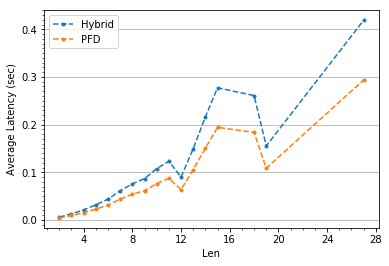

In [60]:
# Plot queries average latency according to len(query) #
dataHybrid = inputDataHybrid.groupby('len').latency.mean()
dataPFD = inputDataPFD.groupby('len').latency.mean()
#inputDataPFD.groupby('len').latency.count()

figure, ax = plt.subplots()
# Tickers #
min_x = MultipleLocator(1)
max_x = MultipleLocator(4)
min_y = MultipleLocator(0.01)
max_y = MultipleLocator(0.1)
ax.xaxis.set_major_locator(max_x)
ax.xaxis.set_minor_locator(min_x)
ax.yaxis.set_major_locator(max_y)
ax.yaxis.set_minor_locator(min_y)

ax.plot(dataHybrid, marker='.', linestyle='--', label='Hybrid')
ax.plot(dataPFD, marker='.', linestyle='--', label='PFD')
ax.set_xlabel('Len')
ax.set_ylabel('Average Latency (sec)')
ax.yaxis.grid(True)
#ax.set_xlim([2,12])
#ax.set_ylim([0.0, 0.2])
ax.legend()

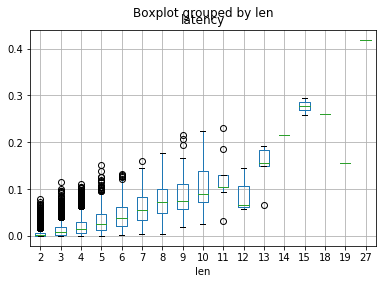

In [51]:
inputDataHybrid.boxplot('latency', 'len')

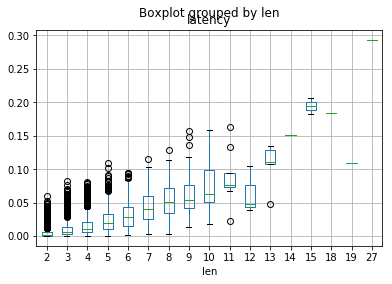

In [52]:
inputDataPFD.boxplot('latency', 'len')

In [74]:
latencyAVG = pd.concat([dataHybrid, dataPFD], axis=1)
latencyAVG.columns = ['Hybrid', 'PFD']
print latencyAVG

          Hybrid          PFD
len                          
2   0.0059196221 0.0043339527
3   0.0130064487 0.0094306792
4   0.0208745761 0.0150540513
5   0.0319751392 0.0229275047
6   0.0437142000 0.0312189345
7   0.0612538899 0.0437132615
8   0.0758495000 0.0539911429
9   0.0867525417 0.0614807917
10  0.1077684762 0.0762191905
11  0.1231526667 0.0874825556
12  0.0899800000 0.0636483333
13  0.1495450000 0.1058582000
14  0.2162070000 0.1506420000
15  0.2772785000 0.1944180000
18  0.2609400000 0.1835930000
19  0.1552510000 0.1086600000
27  0.4189760000 0.2937580000
